In [1]:
import django
import os
os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'config.settings.local')
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

from ect_66_analysis.analysis.models import *

In [2]:
import pandas as pd
from collections import defaultdict
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.font_manager

matplotlib.font_manager.fontManager.addfont('/usr/share/fonts/truetype/tlwg/Sawasdee.ttf')

matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': ['Sawasdee'],
    }
)

# EXCLUDE_PARTY_NO = []
EXCLUDE_PARTY_NO = [7, 11, 14, 18, 22, 25, 26, 29, 31, 32, 37]

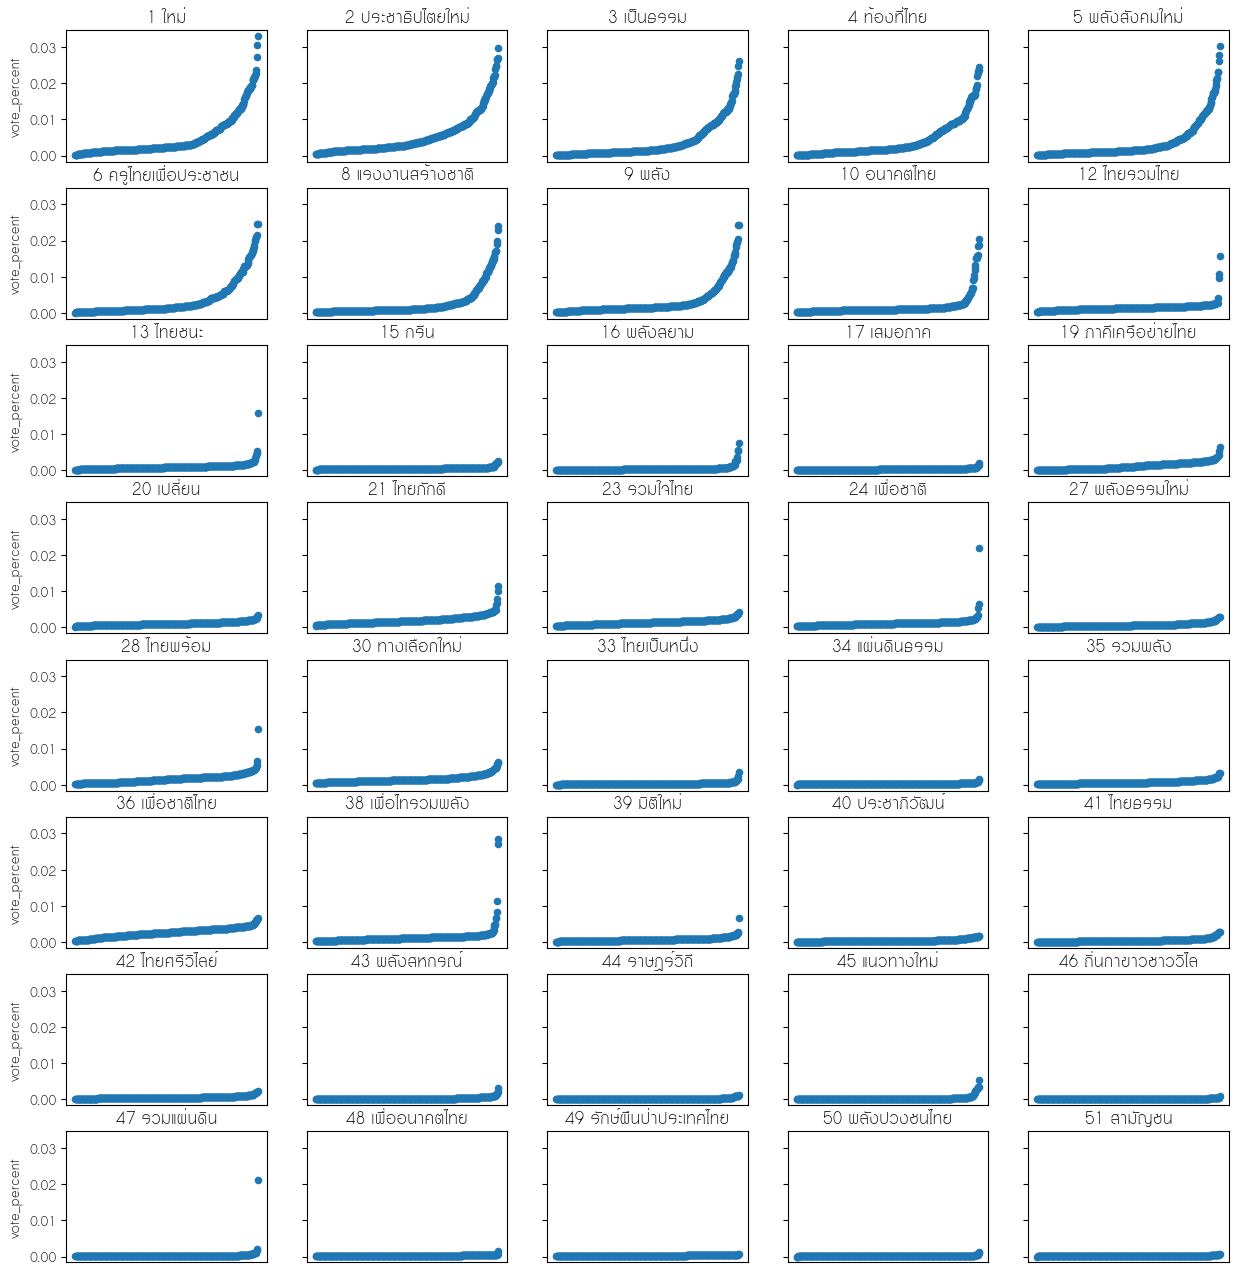

In [5]:
# Sorted vote_percent plot

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True)
for i, party in enumerate(parties[:40]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party)
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df.reset_index().sort_values(
        'vote_percent'
    ).plot(
        x='cons_id', y='vote_percent', kind='scatter', title=f'{party.party_no} {party.name}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )


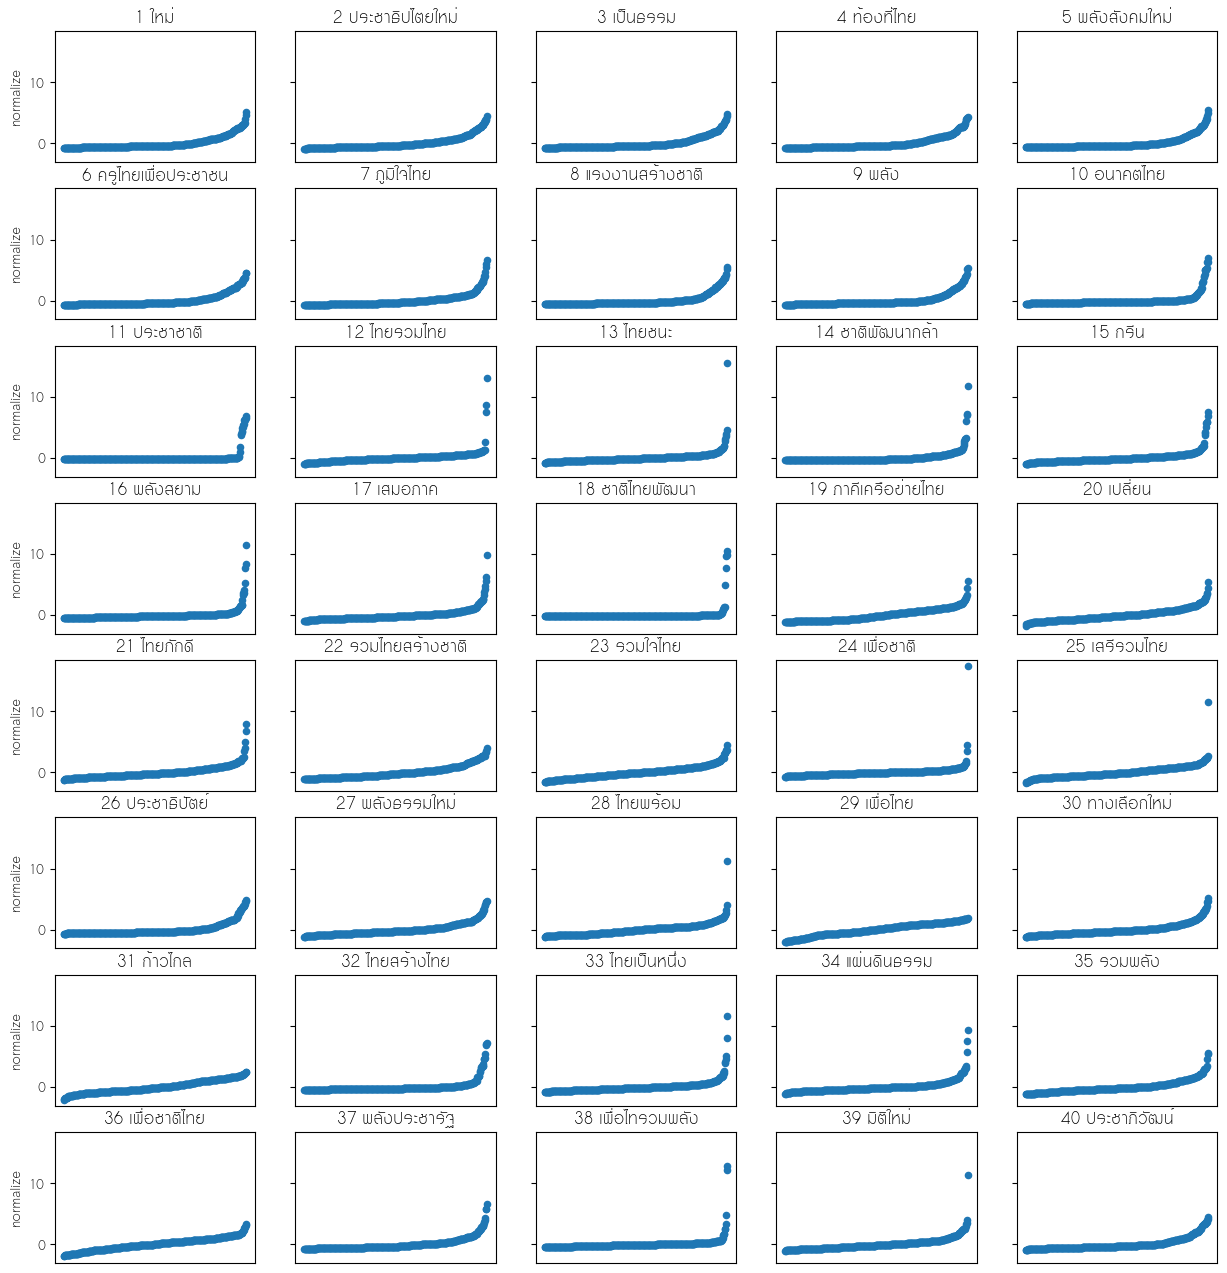

In [153]:
# Sorted normalized vote_percent plot

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharey=True)
for i, party in enumerate(parties[:40]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party)
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df.sort_values(
        'vote_percent'
    ).plot(
        x='cons_id', y='normalize', kind='scatter', title=f'{party.party_no} {party.name}', 
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

/home/napat/venv/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/napat/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


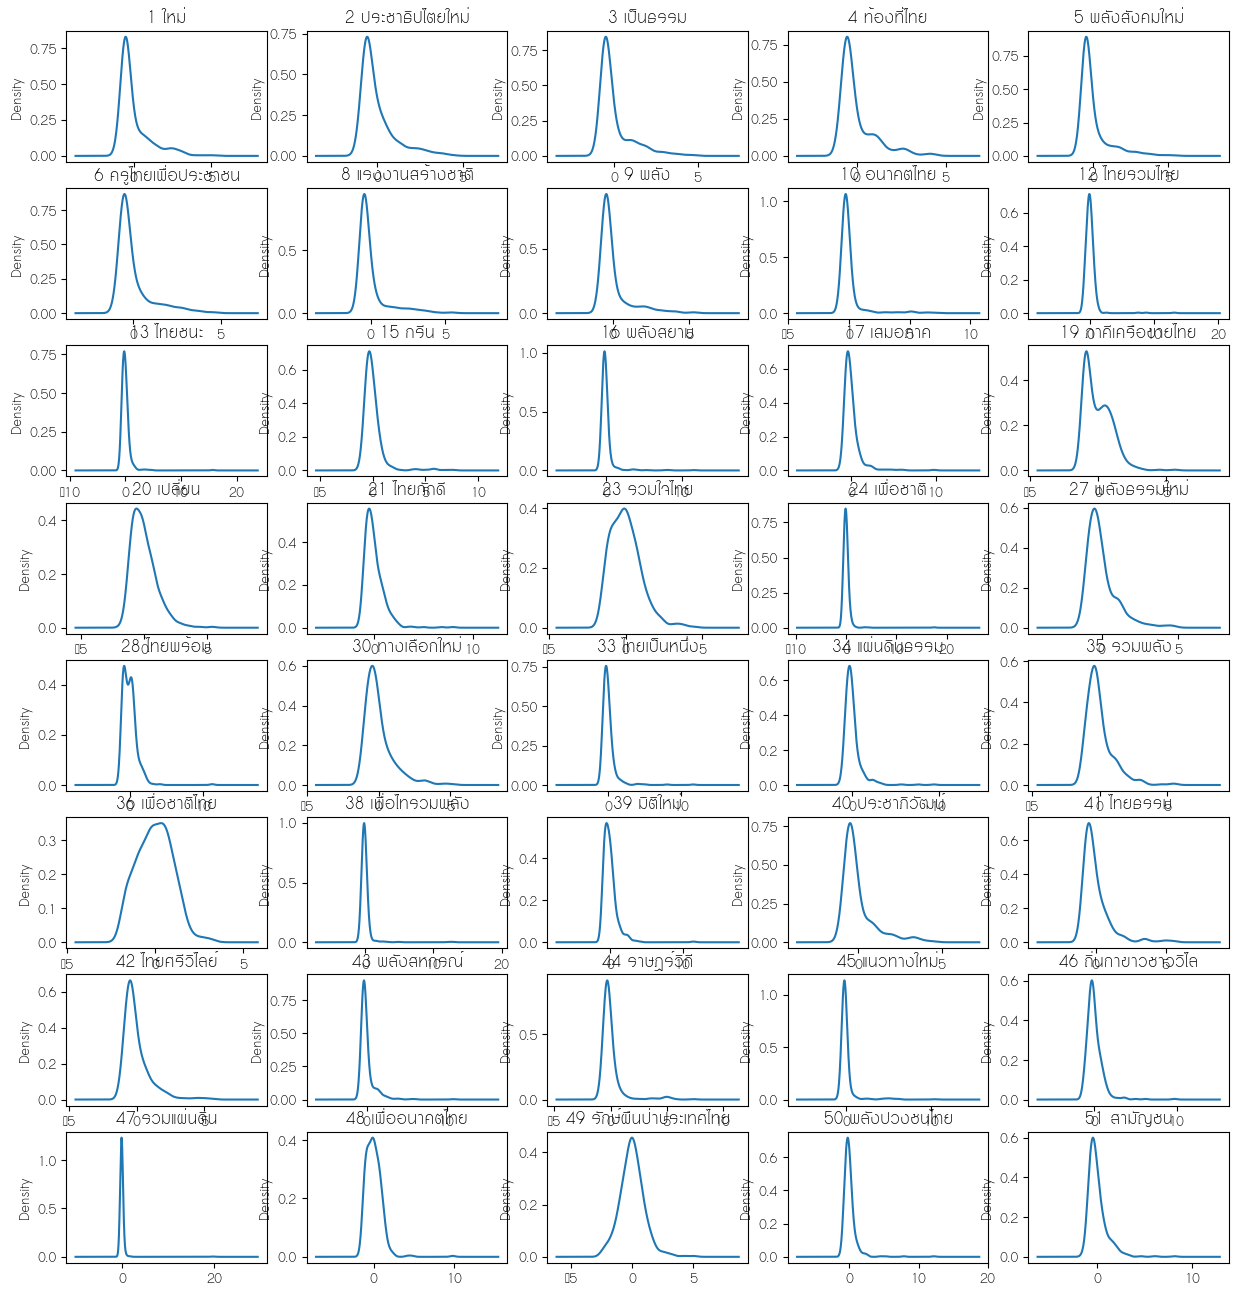

In [74]:
# normalize kde plot

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16))
for i, party in enumerate(parties[:40]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party)
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df['normalize'].plot(kind='kde', title=f'{party.party_no} {party.name}', 
        ax=axes[i//5][i%5], 
        # xticks=[], xlabel=''
    )

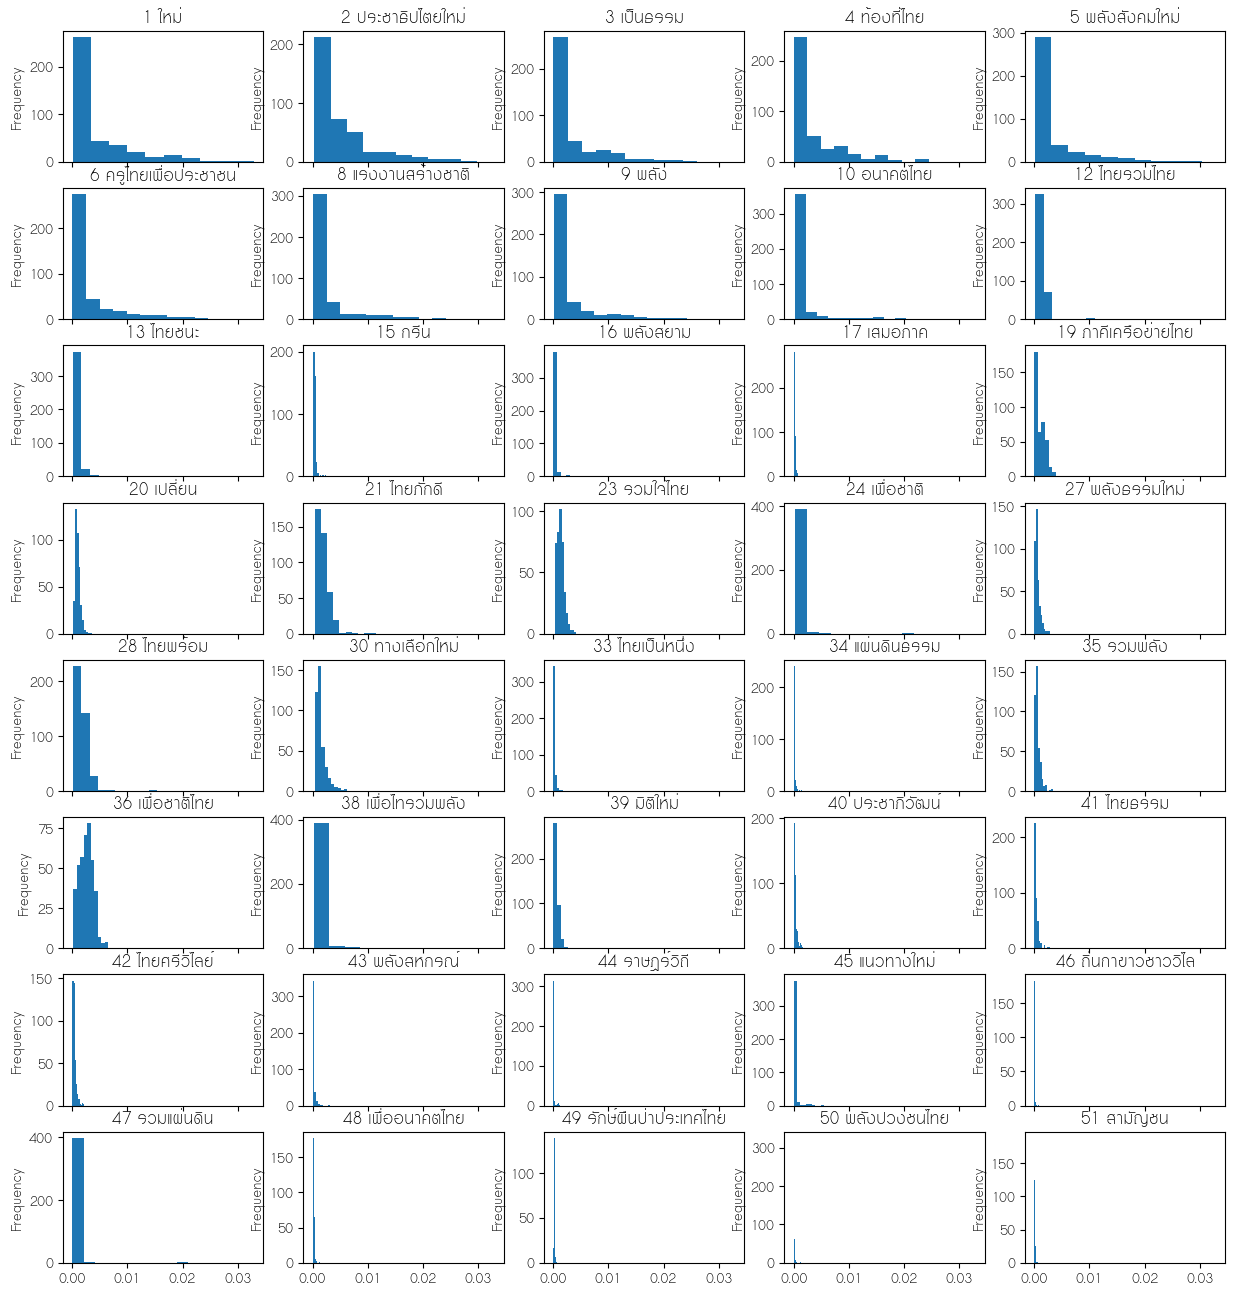

In [75]:
# vote_percent hist plot

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharex=True)
for i, party in enumerate(parties[:40]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party)
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['vote_percent'].plot(kind='hist', title=f'{party.party_no} {party.name}', 
        ax=axes[i//5][i%5]
    )

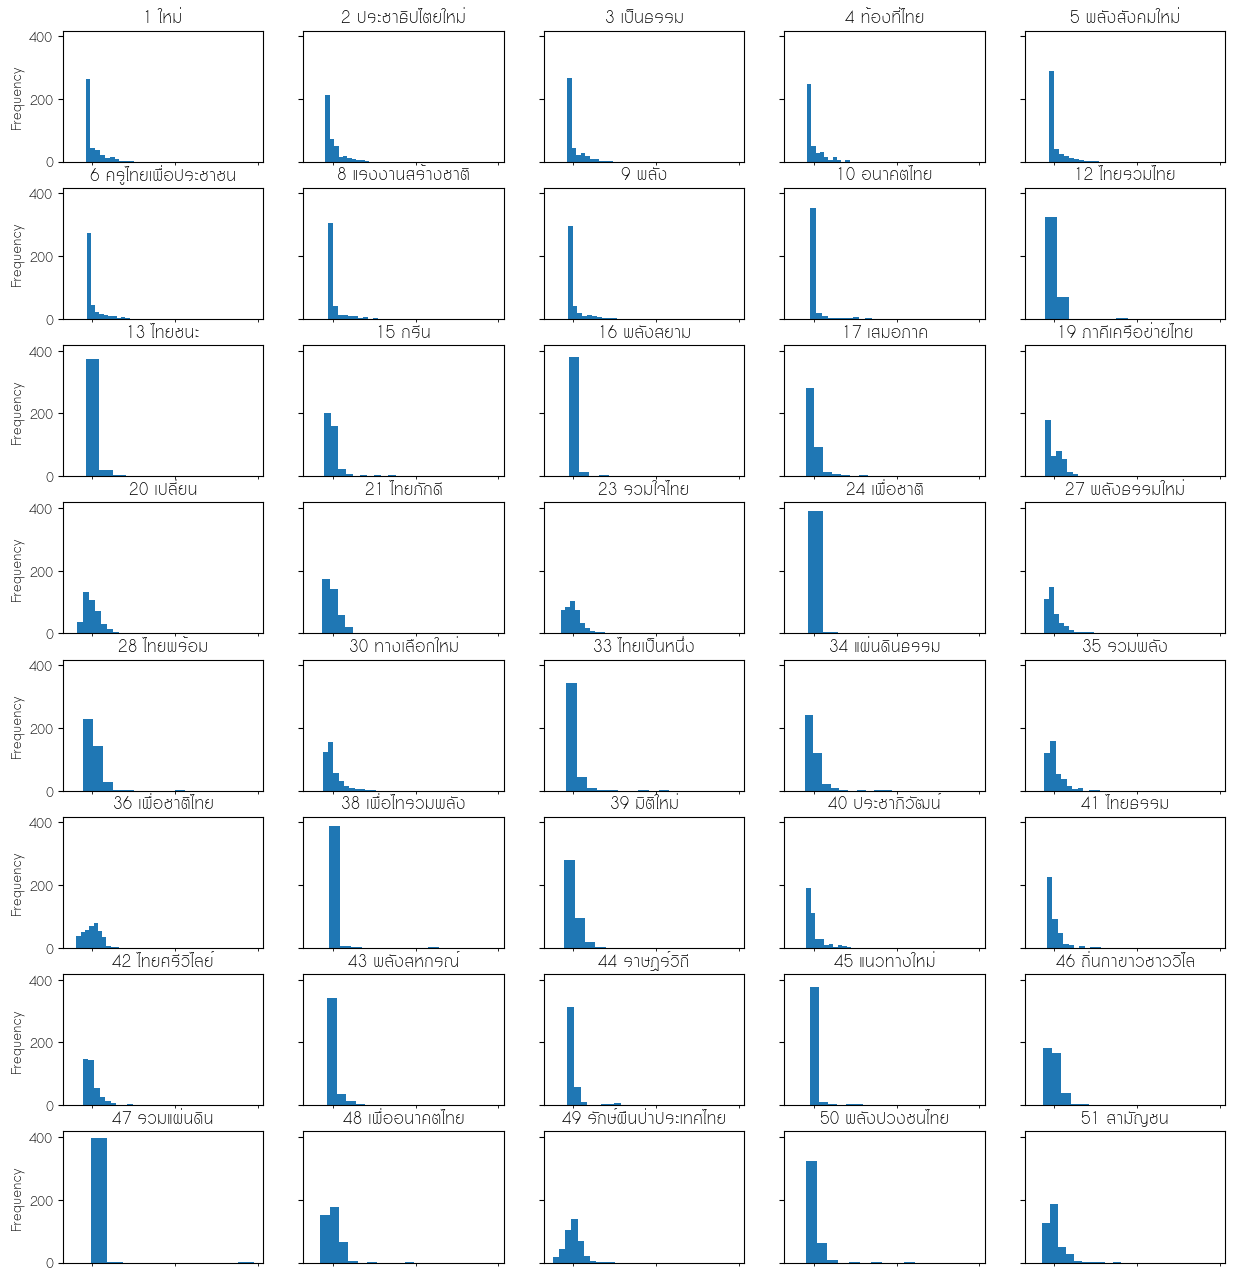

In [76]:
# normalize hist plot

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=8, ncols=5, figsize=(15, 16), sharex=True, sharey=True)
for i, party in enumerate(parties[:40]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party)
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df['normalize'].plot(kind='hist', title=f'{party.party_no} {party.name}', 
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

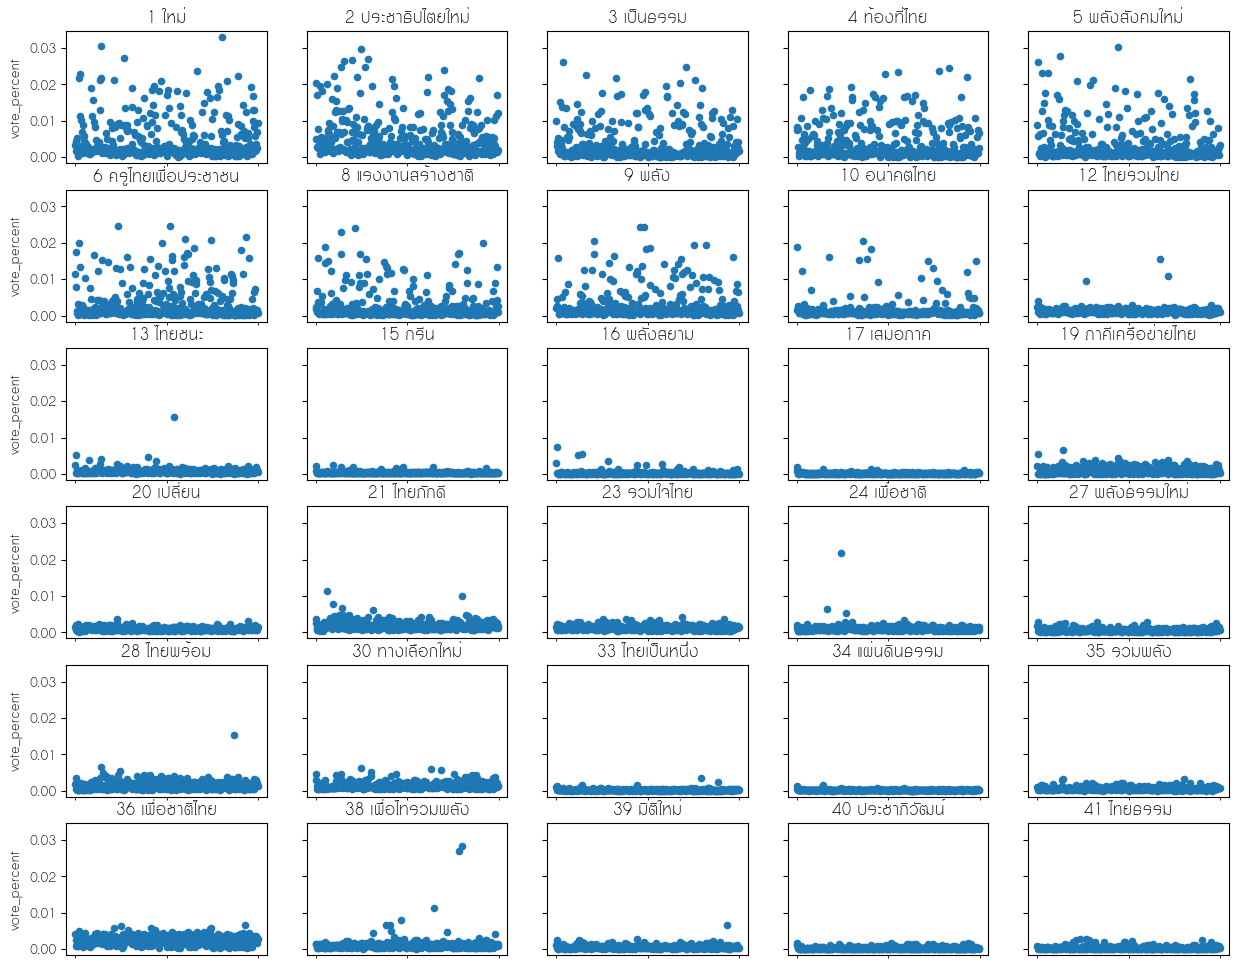

In [83]:
parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 12), sharex=True, sharey=True)
for i, party in enumerate(parties[:30]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party).order_by('cons__registered_vote')
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df.plot(
        x='cons_id', y='vote_percent', kind='scatter', title=f'{party.party_no} {party.name}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

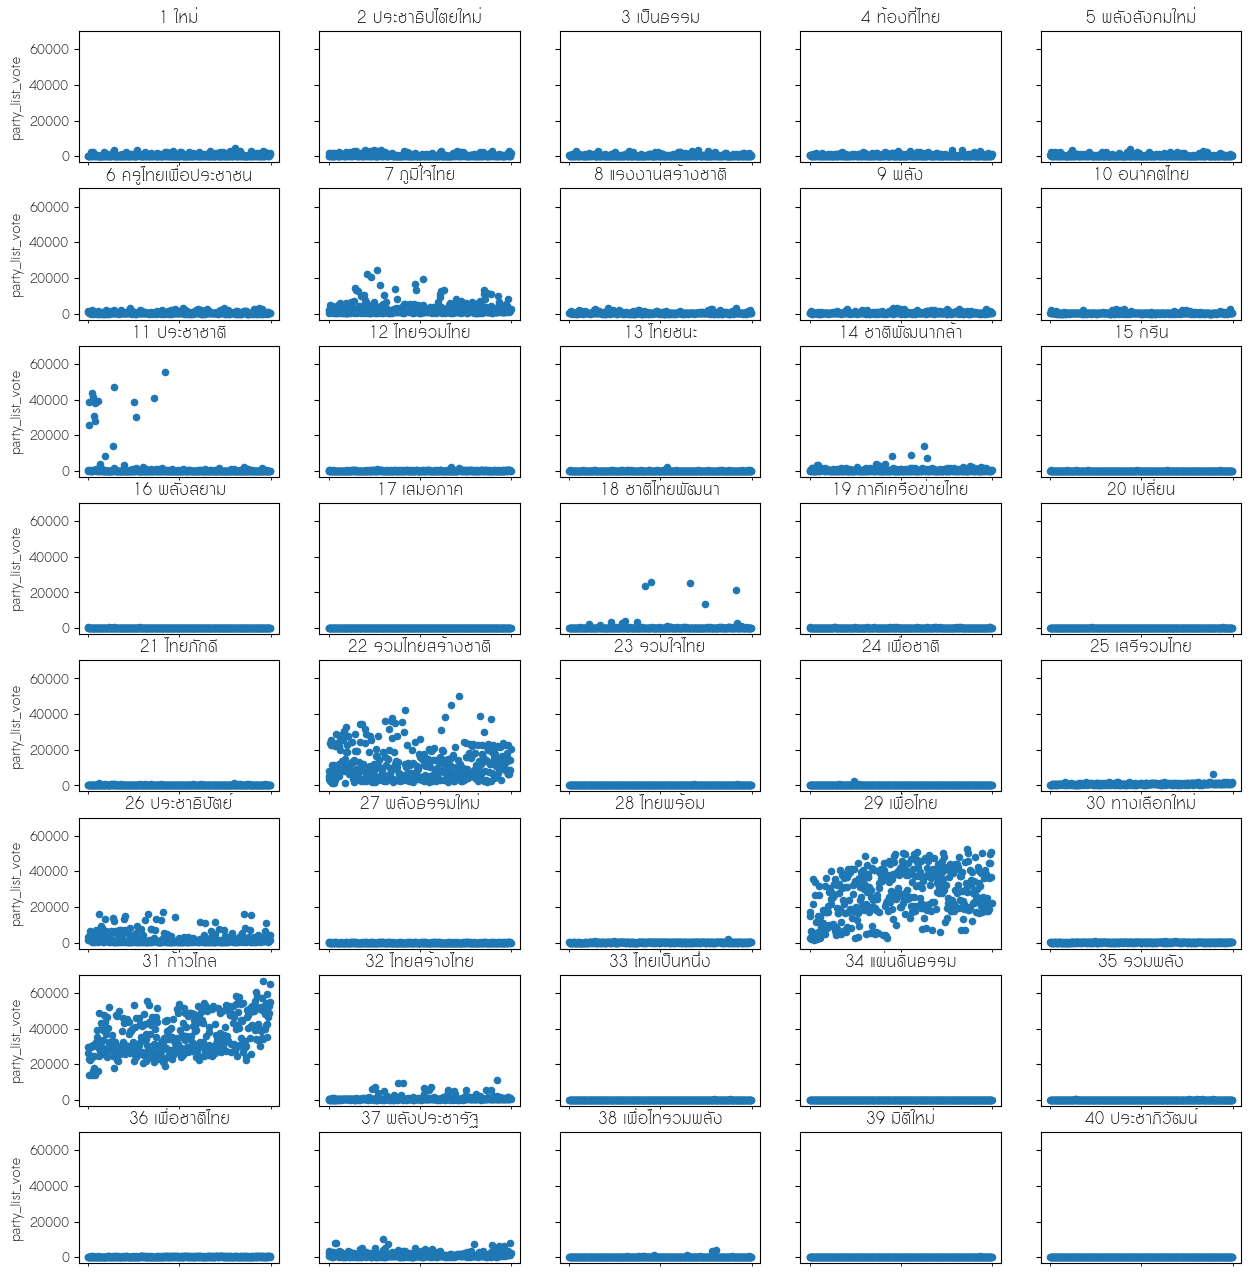

In [152]:
parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
fig,axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 12), sharex=True, sharey=True)
for i, party in enumerate(parties[:30]):
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party).order_by('cons__registered_vote')
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df.plot(
        x='cons_id', y='party_list_vote', kind='scatter', title=f'{party.party_no} {party.name}',
        ax=axes[i//5][i%5], xticks=[], xlabel=''
    )

In [ ]:
parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
for party in parties[:10]:
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party).order_by('cons__registered_vote')
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    

In [6]:
suspected_constituencies = defaultdict(lambda: {
    'count': 0,
    'parties': {}
})
threshold = 2

parties = Party.objects.filter(party_no__isnull=False).exclude(party_no__in=EXCLUDE_PARTY_NO)
for party in parties[:9]:
    party_list_result = ResultConstituenciesPartyListConst.objects.select_related(
        'cons'
    ).filter(party=party).order_by('cons__registered_vote')
    df = pd.DataFrame(party_list_result.values(
        'cons_id', 'cons__registered_vote', 'party_list_vote'
    ))
    df['vote_percent'] = df['party_list_vote'] / df['cons__registered_vote']
    df['normalize'] = (df['vote_percent']-df['vote_percent'].mean()) / df['vote_percent'].std()
    df['sdx'] = df['normalize'] >= threshold
    perc_75 = df['vote_percent'].describe()['75%']
    mean = df[df['vote_percent'] <= perc_75]['vote_percent'].mean()
    for cons_id in set(df[df['sdx']]['cons_id']):
        suspected_constituencies[cons_id]['count'] += 1
        suspected_constituencies[cons_id]['parties'][party] = {
            'mean': mean,
            'sd': df['vote_percent'].std(),
            'vote': df[df['cons_id'] == cons_id]['vote_percent'].values[0]
        }
    print('{} {} {}'.format(party, mean, df['vote_percent'].std()))
    
ordered_suspected_constituencies = sorted(
    [(con, d['count']) for con, d in suspected_constituencies.items()], 
    key=lambda x: x[0]
)
print(len(ordered_suspected_constituencies))

[1] ใหม่ 0.0020838919983317663 0.005584284817969388
[2] ประชาธิปไตยใหม่ 0.002681487179393162 0.005528392766996341
[3] เป็นธรรม 0.001273166168104354 0.0047430682179403745
[4] ท้องที่ไทย 0.0015526371279450182 0.004744068224574547
[5] พลังสังคมใหม่ 0.0011984616296848074 0.0049800045394402526
[6] ครูไทยเพื่อประชาชน 0.0011464791267341338 0.004715263199530886
[8] แรงงานสร้างชาติ 0.0008373715845832913 0.003932198326587808
[9] พลัง 0.0012063836733956727 0.004057603167837081
[10] อนาคตไทย 0.0007499024110277746 0.002693614393728673
186


In [8]:
for p, d in suspected_constituencies['CMI_6']['parties'].items():
    print(p, d)

[10] อนาคตไทย {'mean': 0.0007499024110277746, 'sd': 0.002693614393728673, 'vote': 0.0151796973518285}


In [9]:
cons_dict = {c.cons_id: c for c in Constituency.objects.all()}
cheating_parties = defaultdict(lambda: 0)
with open('/tmp/out.txt', 'w') as f:
    for cons_id, _ in ordered_suspected_constituencies:
        results = ResultConstituenciesCandidateConst.objects.filter(
            cons_id=cons_id
        ).select_related('cons', 'mp_app', 'party').order_by('mp_app_rank')
        f.write('{} {} {}\n'.format(cons_id, results[0].cons.prov.province, results[0].cons.zone))
        party_1_10 = set()
        for p, d in suspected_constituencies[cons_id]['parties'].items():
            party_1_10.add(p.party_no)
            f.write('{} {} {}/{}\n'.format(
                p.party_no, p.name,
                round(cons_dict[cons_id].registered_vote * (d['vote']-d['mean'])),
                round(cons_dict[cons_id].registered_vote * d['vote']), 
            ))
        f.write('---\n')
        if results[0].mp_app.mp_app_no in party_1_10:
            cheating_parties[results[0].party] += 1
        for r in results[:4]:
            f.write('{} {} {} {}\n'.format(
                r.mp_app.mp_app_no, r.party.name, r.mp_app.mp_app_name, r.mp_app_vote
            ))
        f.write('======\n\n')

In [10]:
cheating_parties

defaultdict(<function __main__.<lambda>()>,
            {<Party: [7] ภูมิใจไทย>: 52,
             <Party: [22] รวมไทยสร้างชาติ>: 8,
             <Party: [29] เพื่อไทย>: 45,
             <Party: [37] พลังประชารัฐ>: 29,
             <Party: [26] ประชาธิปัตย์>: 9,
             <Party: [18] ชาติไทยพัฒนา>: 7,
             <Party: [14] ชาติพัฒนากล้า>: 1,
             <Party: [11] ประชาชาติ>: 3,
             <Party: [38] เพื่อไทรวมพลัง>: 1,
             <Party: [32] ไทยสร้างไทย>: 2})